In [52]:
import re   # regular expression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
X=[]
Y=[]

non_decimal=re.compile(r'[^\d]+')

In [54]:
#df=pd.read_csv('moore.csv')
for line in open('moore.csv'):
    #print(line.split('\t')[1],line.split('\t')[2])
    trans_num=line.split('\t')[1].split('[')[0]
    year=line.split('\t')[2].split('[')[0]
    y=int(non_decimal.sub('',trans_num))
    x=int(non_decimal.sub('',year))              #remove all comma between digits and ~    e.g. ~7,200,000 to 7200000000 

    X.append(x)
    Y.append(y)

X=np.array(X)
Y=np.array(Y)



In [55]:
Y

array([       2300,        3500,        4500,        4100,        5000,
              8000,        3510,        6500,        8500,       29000,
              9000,       29000,       68000,       11500,       55000,
            134000,       22000,      190000,       25000,      275000,
             16000,       30000,      553000,      180000,      250000,
            300000,     1180235,       35000,     1350000,     3100000,
            578977,     5500000,     2500000,     4300000,     8800000,
           7500000,     7500000,    21300000,    22000000,      111000,
          27400000,     9500000,    42000000,    21000000,    45000000,
         220000000,    55000000,   105900000,    54300000,   410000000,
         592000000,   112000000,   169000000,   228000000,   241000000,
         291000000,  1700000000,   184000000,   362000000,   463000000,
          26000000,   169000000,   411000000,   789000000,   758000000,
          47000000,   230000000,   731000000,  1900000000,   904

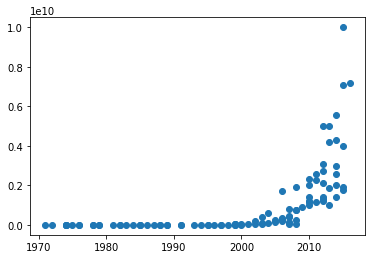

In [56]:
plt.scatter(X,Y)                   #not log convert

In [59]:
Y=np.log(Y)    #logaritmic increase to easy fit linear

In [60]:
denominator=X.dot(X)-X.sum()*X.mean()   #N is divided to get means
a_nominator=X.dot(Y)-X.mean()*Y.sum()
b_nominator=Y.mean()*((X**2).sum())-X.mean()*X.dot(Y)     # or Y.mean()*X.dot(X)-X.mean()*X.dot(Y) 
a=a_nominator/denominator
b=b_nominator/denominator

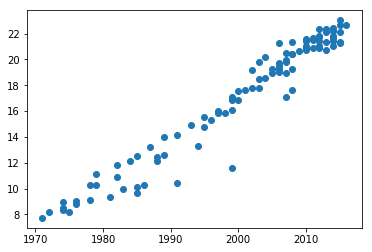

In [61]:
plt.scatter(X,Y)

In [62]:
y_new=a*X+b

In [63]:
y_new

array([ 6.90659872,  7.25764229,  7.95972944,  7.95972944,  7.95972944,
        7.95972944,  8.31077301,  8.66181659,  8.66181659,  9.36390373,
        9.36390373,  9.71494731,  9.71494731, 10.41703445, 10.76807803,
       10.76807803, 11.1191216 , 11.47016517, 11.82120875, 11.82120875,
       11.82120875, 12.17225232, 12.52329589, 12.87433947, 12.87433947,
       13.22538304, 13.22538304, 13.92747019, 13.92747019, 14.62955733,
       14.98060091, 15.33164448, 15.33164448, 15.68268805, 16.03373163,
       16.03373163, 16.3847752 , 16.73581877, 16.73581877, 16.73581877,
       16.73581877, 16.73581877, 17.08686235, 17.08686235, 17.43790592,
       17.7889495 , 17.7889495 , 18.13999307, 18.13999307, 18.13999307,
       18.49103664, 18.49103664, 18.84208022, 18.84208022, 19.19312379,
       19.19312379, 19.19312379, 19.19312379, 19.19312379, 19.54416736,
       19.54416736, 19.54416736, 19.54416736, 19.54416736, 19.89521094,
       19.89521094, 19.89521094, 19.89521094, 19.89521094, 20.24

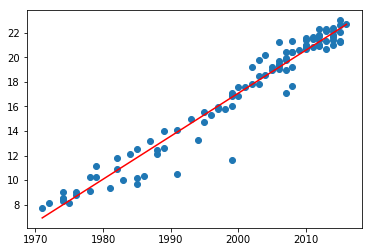

In [64]:
plt.scatter(X,Y)
plt.plot(X,y_new,'r-')

In [65]:
R_squared=1-(((Y-y_new).dot(Y-y_new))/((Y-Y.mean()).dot(Y-Y.mean())))

In [66]:
R_squared

0.952944285228576